In [ ]:
from itertools import product, combinations, permutations
import keyboard
import pyautogui as g
import time
import pytesseract
import random
import tkinter as tk
import threading
import pandas as pd
import math

In [138]:
#põe o mouse na posição correta
time.sleep(2)
img = g.locateOnScreen('PokerStarsImages/referencia.png', confidence = 0.9, region = (100,0,1500,600), grayscale = True)
g.moveTo(img[0]+20, img[1]+10)
#arrasta o mouse até encaixar a tela na posição
g.dragTo(230, 40, 1)

In [140]:
pytesseract.pytesseract.tesseract_cmd = 'C:\Program Files\Tesseract-OCR/tesseract'
dados = pd.read_excel('dados.xlsx')
parametros = pd.read_excel('parametros.xlsx')

suits = ('o','e','c','p')
values = (2,3,4,5,6,7,8,9,10,11,12,13,14)

mao = ['00','00']
mesa = ['00','00','00','00','00']

pessoas = [0,0,0,0,0]
banca = [0,0,0,0,0]
faltam = 0
pote = 0
pagar = 0
bb = 100
num = 0
turno = 0
bancaTotal = 100*bb
bancaInicial = 0
rating = 0
pago = 0
aposto = 0
apostado = [0,0,0,0,0,0]
mesmoTurno = 1
turnoPassado = 0
desistir = 0
estrategia = 0
moeda = [0,0,0,0,0,0]
moedaOld = [0,0,0,0,0,0]
bigblind = [0,0,0,0,0,0]
smallblind = [0,0,0,0,0,0]

#define as configurações da janela
janela = tk.Tk()
largura = 176
altura = 540
posX = 6
posY = 27
janela.geometry(f"{largura}x{altura}+{posX}+{posY}")
janela.configure(background='#fd9696')

#cria os vetores com as informações e configurações do que aparecerá na janela
valores = []
for _ in range(16):
    valores.append(tk.StringVar())
rotulos = ['0']*16
titulo = tk.StringVar()
espaco = tk.StringVar()

#define as informações mostradas na janela
titulo.set('Peto 1.0')
espaco = ' '
valores[0].set('Mão: ' + str(mao[0]) + ' ' + str(mao[1]))
valores[1].set('Mesa: ' + str(mesa[0]) + ' ' + str(mesa[1]) + ' ' + str(mesa[2]) + ' ' + str(mesa[3]) + ' ' + str(mesa[4]))
valores[2].set('Pagar: ' + str(pagar))
valores[3].set('Pote: ' + str(pote))
valores[4].set('Pessoas: ' + str(pessoas[0]) + ' ' + str(pessoas[1]) + ' ' + str(pessoas[2]) + ' ' + str(pessoas[3]) + ' ' + str(pessoas[4]))
valores[5].set('Banca: ' + str(banca[0]) + ' ' + str(banca[1]) + ' ' + str(banca[2]) + ' ' + str(banca[3]) + ' ' + str(banca[4]))
valores[6].set('Faltam: ' + str(faltam))
valores[7].set('Pago no máximo: ' + str(pago))
valores[8].set('Apostaria: ' + str(round(aposto)))
valores[9].set('Minha banca: ' + str(bancaTotal))
valores[10].set('Rating do preflop: ' + str(rating))
valores[11].set('Winrate: ' + '0')
valores[12].set('Tierate: ' + '0')
valores[13].set('Winrate ajustado: ' + '0')
valores[14].set('Apostado : ' + str(apostado[1]) + ' ' + str(apostado[2]) + ' ' + str(apostado[3]) + ' ' + str(apostado[4]) + ' ' + str(apostado[5]))
valores[15].set('Esperando minha vez')

rotulo2 = tk.Label(janela, background='#fd9696', textvariable=espaco)
rotulo2.pack()
rotulo1 = tk.Label(janela, background='#fd9696', textvariable=titulo)
rotulo1.pack()
rotulo2 = tk.Label(janela, background='#fd9696', textvariable=espaco)
rotulo2.pack()
#lançara as informações na janela, dando um espaço de 1 linha vazia antes de lançar a última informação
for r in range(len(rotulos)-1):
    rotulos[r] = tk.Label(janela, background='#fd9696', textvariable=valores[r])
    rotulos[r].pack()
rotulo2 = tk.Label(janela, background='#fd9696', textvariable=espaco)
rotulo2.pack()
rotulos[15] = tk.Label(janela, background='#fd9696', textvariable=valores[15])
rotulos[15].pack()

winrateRating = 0
tierateRating = 0

maos = {
    (14, 14, 0): 169, (13, 13, 0): 168, (12, 12, 0): 167, (14, 13, 1): 166, (11, 11, 0): 165,
    (14, 12, 1): 164, (13, 12, 1): 163, (14, 11, 1): 162, (13, 11, 1): 161, (10, 10, 0): 160,
    (14, 13, 0): 159, (14, 10, 1): 158, (12, 11, 1): 157, (13, 10, 1): 156, (12, 10, 1): 155,
    (11, 10, 1): 154, (9, 9, 0): 153, (14, 12, 0): 152, (14, 9, 1): 151, (13, 12, 0): 150,
    (8, 8, 0): 149, (13, 9, 1): 148, (10, 9, 1): 147, (14, 8, 1): 146, (12, 9, 1): 145,
    (11, 9, 1): 144, (14, 11, 0): 143, (14, 5, 1): 142, (7, 7, 0): 141, (14, 7, 1): 140,
    (13, 11, 0): 139, (14, 4, 1): 138, (14, 3, 1): 137, (14, 6, 1): 136, (12, 11, 0): 135,
    (6, 6, 0): 134, (13, 8, 1): 133, (10, 8, 1): 132, (14, 2, 1): 131, (9, 8, 1): 130,
    (11, 8, 1): 129, (14, 10, 0): 128, (12, 8, 1): 127, (13, 7, 1): 126, (13, 10, 0): 125,
    (5, 5, 0): 124, (11, 10, 0): 123, (8, 7, 1): 122, (12, 10, 0): 121, (4, 4, 0): 120,
    (3, 3, 0): 119, (2, 2, 0): 118, (13, 6, 1): 117, (9, 7, 1): 116, (13, 5, 1): 115,
    (7, 6, 1): 114, (10, 7, 1): 113, (13, 4, 1): 112, (13, 3, 1): 111, (13, 2, 1): 110,
    (12, 7, 1): 109, (8, 6, 1): 108, (6, 5, 1): 107, (11, 7, 1): 106, (5, 4, 1): 105,
    (12, 6, 1): 104, (7, 5, 1): 103, (9, 6, 1): 102, (12, 5, 1): 101, (6, 4, 1): 100,
    (12, 4, 1): 99, (12, 3, 1): 98, (10, 9, 0): 97, (10, 6, 1): 96, (12, 2, 1): 95,
    (14, 9, 0): 94, (5, 3, 1): 93, (8, 5, 1): 92, (11, 6, 1): 91, (11, 9, 0): 90,
    (13, 9, 0): 89, (11, 5, 1): 88, (12, 9, 0): 87, (4, 3, 1): 86, (7, 4, 1): 85,
    (11, 4, 1): 84, (11, 3, 1): 83, (9, 5, 1): 82, (11, 2, 1): 81, (6, 3, 1): 80,
    (14, 8, 0): 79, (5, 2, 1): 78, (10, 5, 1): 77, (8, 4, 1): 76, (10, 4, 1): 75,
    (10, 3, 1): 74, (4, 2, 1): 73, (10, 2, 1): 72, (9, 8, 0): 71, (10, 8, 0): 70,
    (14, 5, 0): 69, (14, 7, 0): 68, (7, 3, 1): 67, (14, 4, 0): 66, (3, 2, 1): 65,
    (9, 4, 1): 64, (9, 3, 1): 63, (11, 8, 0): 62, (14, 3, 0): 61, (6, 2, 1): 60,
    (9, 2, 1): 59, (13, 8, 0): 58, (14, 6, 0): 57, (8, 7, 0): 56, (12, 8, 0): 55,
    (8, 3, 1): 54, (14, 2, 0): 53, (8, 2, 1): 52, (9, 7, 0): 51, (7, 2, 1): 50,
    (7, 6, 0): 49, (13, 7, 0): 48, (6, 5, 0): 47, (10, 7, 0): 46, (13, 6, 0): 45,
    (8, 6, 0): 44, (5, 4, 0): 43, (13, 5, 0): 42, (11, 7, 0): 41, (7, 5, 0): 40,
    (12, 7, 0): 39, (13, 4, 0): 38, (13, 3, 0): 37, (9, 6, 0): 36, (13, 2, 0): 35,
    (6, 4, 0): 34, (12, 6, 0): 33, (5, 3, 0): 32, (8, 5, 0): 31, (10, 6, 0): 30,
    (12, 5, 0): 29, (4, 3, 0): 28, (12, 4, 0): 27, (12, 3, 0): 26, (7, 4, 0): 25,
    (12, 2, 0): 24, (11, 6, 0): 23, (6, 3, 0): 22, (11, 5, 0): 21, (9, 5, 0): 20,
    (5, 2, 0): 19, (11, 4, 0): 18, (11, 3, 0): 17, (4, 2, 0): 16, (11, 2, 0): 15,
    (8, 4, 0): 14, (10, 5, 0): 13, (10, 4, 0): 12, (3, 2, 0): 11, (10, 3, 0): 10,
    (7, 3, 0): 9, (10, 2, 0): 8, (6, 2, 0): 7, (9, 4, 0): 6, (9, 3, 0): 5,
    (9, 2, 0): 4, (8, 3, 0): 3, (8, 2, 0): 2, (7, 2, 0): 1
}

print('rodando')

#variáveis que serão salvar ao final da partida
apostaMinimaD = ''
pagueiD = ''
faltamD = ''
pessoasD = ''
poteD = ''
winrateD = ''
turnoD = ''
mesmoTurnoD = ''

global apostaMinimaD
global pagueiD
global faltamD
global pessoasD
global poteD
global winrateD
global turnoD
global mesmoTurnoD


def Calcular():
    global estrategia
    global maos
    global winrateRating
    
    valores[15].set('Calculando as probabilidades')
    #une todas as combinações entre naipes e valores, formando todas as 52 cartas do baralho
    deck = [str(card[0]) + card[1] for card in list(product(values, suits))]
    #remove do baralho as cartas que estão na mão e na mesa
    deck.pop(deck.index(mao[0])) 
    deck.pop(deck.index(mao[1]))
    for i in mesa:
        if i in deck:
            deck.pop(deck.index(i))

    #define o turno com base no número de cartas na mesa

    win = 0
    lose = 0
    tie = 0
    
    winRating = 0
    tieRating = 0
    loseRating = 0
    
    winstr = 0
    winflush = 0

    #cria um loop para cada combinação de cartas que pode aparecer para completar a mesa e a mão do adversário
    for j in list(combinations(deck,num+2)):

        #calcula as permutações possíveis para as cartas selecionadas 
        if num == 2:
            cartas = [[j[0],j[1],j[2],j[3]],[j[0],j[2],j[1],j[3]],[j[0],j[3],j[1],j[2]],[j[1],j[2],j[0],j[3]],[j[1],j[3],j[0],j[2]],[j[2],j[3],j[0],j[1]]]
        elif num == 1:
            cartas = [[j[0],j[1],j[2]],[j[1],j[0],j[2]],[j[2],j[0],j[1]]]
        else:
            cartas = [j]

        #para cada possibilidade de cartas na mesa e na mão do adversário roda uma vez o código
        for i in cartas:

            #decide aleatoriamente se a possibilidade será calculada, isso é feito para agilizar o código perdendo precisão
            aleatorio = random.randint(0,15)      
            if aleatorio == 0 or num != 2:

                jogada1 = [0,0,0,0,0,0]
                jogada2 = [0,0,0,0,0,0]

                #roda uma vez para a mão e uma vez para a mão do adversário
                for k in range(2):

                    #O primeiros valores são os mais importantes na decisão de quem ganha e os ultimos são
                    #menos importantes, como a terceira carta alta de um par
                    par = [0,0,0,0]
                    pares = [0,0,0]
                    trinca = [0,0,0]
                    fullHouse = [0,0]
                    quadra = [0,0]
                    sequ = 0
                    naipeFlush = [0,'0',0,0,0,0]
                    strflush = [0,'0']

                    if turno == 2:
                        if k == 0:
                            jogada = [mao[0],mao[1],mesa[0],mesa[1],mesa[2],i[0],i[1]]
                        else:
                            jogada = [i[2],i[3],mesa[0],mesa[1],mesa[2],i[0],i[1]]
                    elif turno == 3:
                        if k == 0:
                            jogada = [mao[0],mao[1],mesa[0],mesa[1],mesa[2],mesa[3],i[0]]
                        else:
                            jogada = [i[1],i[2],mesa[0],mesa[1],mesa[2],mesa[3],i[0]]
                    elif turno == 4:
                        if k == 0:
                            jogada = [mao[0],mao[1],mesa[0],mesa[1],mesa[2],mesa[3],mesa[4]]
                        else:
                            jogada = [i[0],i[1],mesa[0],mesa[1],mesa[2],mesa[3],mesa[4]]

                    #cria um vetor com apenas os valores das cartas
                    seq = [int(jogada[0][:-1]),int(jogada[1][:-1]),int(jogada[2][:-1]),int(jogada[3][:-1]),int(jogada[4][:-1]),int(jogada[5][:-1]),int(jogada[6][:-1])]
                    #remove os valores repetidos e depois os ordena em ordem crescente
                    straight = set(seq)
                    straight = sorted(straight)

                    #interpreta a possibilidade de uma sequencia que começa com a carta 'A'
                    if 2 in straight and 3 in straight and 4 in straight and 5 in straight and 14 in straight and 6 not in straight:
                        straight = [1,2,3,4,5]

                    #detecta se no vetor de cartas sem números repetidos tem pelo menos 5 cartas diferentes
                    l = len(straight)
                    if l > 4:
                        #caso exista uma sequencia, o valor de uma carta somado a 4 será igual ao da quinta carta,
                        #pois elas estão em ordem e não existe repetição de cartas
                        if l == 5:
                            if straight[0] + 4 == straight[4]:
                                sequ = straight[4]
                        elif l == 6:
                            if straight[1] + 4 == straight[5]:
                                sequ = straight[5]
                            elif straight[0] + 4 == straight[4]:
                                sequ = straight[4]
                        elif l == 7:
                            if straight[2] + 4 == straight[6]:
                                sequ = straight[6]
                            elif straight[1] + 4 == straight[5]:
                                sequ = straight[5]
                            elif straight[0] + 4 == straight[4]:
                                sequ = straight[4]

                    #conta quantas cartas de cada naipe existem
                    countFlush = [0,0,0,0]
                    for a in jogada:
                        if a[-1] == 'o':
                            countFlush[0] = countFlush[0] + 1
                        elif a[-1] == 'e':
                            countFlush[1] = countFlush[1] + 1
                        elif a[-1] == 'c':
                            countFlush[2] = countFlush[2] + 1
                        else:
                            countFlush[3] = countFlush[3] + 1

                    #verifica se houve um flush
                    if countFlush[0] > 4:
                        naipeFlush[1] = 'o'
                    elif countFlush[1] > 4:
                        naipeFlush[1] = 'e'
                    elif countFlush[2] > 4:
                        naipeFlush[1] = 'c'
                    elif countFlush[3] > 4:
                        naipeFlush[1] = 'p'


                    seqflush = []
                    #cria um vetor com os numeros em ordem crescente das cartas que formaram o flush
                    for c in jogada:
                        if naipeFlush[1] == c[-1]:
                            seqflush.append(c)
                    seqflus = []
                    for f in seqflush:
                        seqflus.append(int(f[:-1]))
                    seqflus.sort()           
                    if 2 in seqflus and 3 in seqflus and 4 in seqflus and 5 in seqflus and 14 in seqflus and 6 not in seqflus:
                        seqflus = [1,2,3,4,5]
                    #detecta se existe uma sequencia nas carta que compuseram o flush e também cria a ordem de cartas altas do flush
                    l = len(seqflus)
                    if l == 5:
                        naipeFlush = [seqflus[4],naipeFlush[1],seqflus[3],seqflus[2],seqflus[1],seqflus[0]]
                        if seqflus[0] + 4 == seqflus[4]:
                            strflush[0] = seqflus[4]
                    elif l == 6:
                        naipeFlush = [seqflus[5],naipeFlush[1],seqflus[4],seqflus[3],seqflus[2],seqflus[1]]
                        if seqflus[1] + 4 == seqflus[5]:
                            strflush[0] = seqflus[5]
                        elif seqflus[0] + 4 == seqflus[4]:
                            strflush[0] = seqflus[4]
                    elif l == 7:
                        naipeFlush = [seqflus[6],naipeFlush[1],seqflus[5],seqflus[4],seqflus[3],seqflus[2]]
                        if seqflus[2] + 4 == seqflus[6]:
                            strflush[0] = seqflus[6]
                        elif seqflus[1] + 4 == seqflus[5]:
                            strflush[0] = seqflus[5]
                        elif seqflus[0] + 4 == seqflus[4]:
                            strflush[0] = seqflus[4]
                    if strflush[0] > 0:
                        strflush[1] = naipeFlush[1]

                    #ordena o vetor seq, que contem o valor dar cartas, em ordem decrescente
                    seq.sort(reverse=True)
                    #conta quantas vezes cada valor aparece para detectar as jogadas
                    for a in seq:
                        count = seq.count(a)
                        if count == 4:
                            quadra[0] = a
                        elif count == 3:
                            trinca[0] = a
                            if fullHouse[0] == 0:
                                fullHouse[0] = a
                            elif a != fullHouse[0]:
                                fullHouse[1] = a
                        elif count == 2:
                            par[0] = a
                            if fullHouse[1] == 0:
                                fullHouse[1] = a
                            if pares[0] == 0:
                                pares[0] = a
                            elif pares[1] == 0 and pares[0] != a:
                                pares[1] = a

                    #organiza a ordem das cartas altas para as jogadas
                    for x in jogada:
                        v = int(x[:-1])
                        if v > par[1] and v != par[0]:
                            par[3], par[2], par[1] = par[2], par[1], v
                        elif v > par[2] and v != par[0]:
                            par[3], par[2] = par[2], v
                        elif v > par[3] and v != par[0]:
                            par[3] = v

                        if v > pares[2] and v != pares[0] and v != pares[1]:
                            pares[2] = v

                        if v > trinca[1] and v != trinca[0]:
                            trinca[2], trinca[1] = trinca[1], v
                        elif v > trinca[2] and v != trinca[0]:
                            trinca[2] = v

                        if v > quadra[1] and v != quadra[0]:
                            quadra[1] = v

                    #inverte o straight, que contem as cartas sem repetição em ordem crescente, para indicar cartas altas
                    straight.sort(reverse = True)

                    #escolhe a melhor jogada, indicando qual é a jogada e quais as cartas altas
                    if strflush[0] != 0:
                        if k == 0:
                            jogada1[0]=strflush[0]
                            jogada1[5]=9
                        else:
                            jogada2[0]=strflush[0]
                            jogada2[5]=9
                    elif quadra[0] > 0:
                        if k == 0:
                            jogada1[0]=quadra[0]
                            jogada1[1]=quadra[1]
                            jogada1[5]=9
                        else:
                            jogada2[0]=quadra[0]
                            jogada2[1]=quadra[1]
                            jogada2[5]=8
                    elif fullHouse[0] > 0 and fullHouse[1] > 0:
                        if k == 0:
                            jogada1[0]=fullHouse[0]
                            jogada1[1]=fullHouse[1]
                            jogada1[5]=7
                        else:
                            jogada2[0]=fullHouse[0]
                            jogada2[1]=fullHouse[1]
                            jogada2[5]=7
                    elif naipeFlush[0] > 0:
                        if k == 0:
                            jogada1[0]=naipeFlush[0]
                            jogada1[1]=naipeFlush[2]
                            jogada1[2]=naipeFlush[3]
                            jogada1[3]=naipeFlush[4]
                            jogada1[4]=naipeFlush[5]
                            jogada1[5]=6
                        else:
                            jogada2[0]=naipeFlush[0]
                            jogada2[1]=naipeFlush[2]
                            jogada2[2]=naipeFlush[3]
                            jogada2[3]=naipeFlush[4]
                            jogada2[4]=naipeFlush[5]
                            jogada2[5]=6
                    elif sequ > 0:
                        if k == 0:
                            jogada1[0]=sequ
                            jogada1[5]=5
                        else:
                            jogada2[0]=sequ
                            jogada2[5]=5
                    elif trinca[0] > 0:
                        if k == 0:
                            jogada1[0]=trinca[0]
                            jogada1[1]=trinca[1]
                            jogada1[2]=trinca[2]
                            jogada1[5]=4
                        else:
                            jogada2[0]=trinca[0]
                            jogada2[1]=trinca[1]
                            jogada2[2]=trinca[2]
                            jogada2[5]=4
                    elif pares[0] > 0 and pares[1] > 0:
                        if k == 0:
                            jogada1[0]=pares[0]
                            jogada1[1]=pares[1]
                            jogada1[2]=pares[2]
                            jogada1[5]=3
                        else:
                            jogada2[0]=pares[0]
                            jogada2[1]=pares[1]
                            jogada2[2]=pares[2]
                            jogada2[5]=3
                    elif par[0] > 0:
                        if k == 0:
                            jogada1[0]=par[0]
                            jogada1[1]=par[1]
                            jogada1[2]=par[2]
                            jogada1[3]=par[3]
                            jogada1[5]=2
                        else:
                            jogada2[0]=par[0]
                            jogada2[1]=par[1]
                            jogada2[2]=par[2]
                            jogada2[3]=par[3]
                            jogada2[5]=2
                    else:
                        if k == 0:
                            jogada1[0]=straight[0]
                            jogada1[1]=straight[1]
                            jogada1[2]=straight[2]
                            jogada1[3]=straight[3]
                            jogada1[4]=straight[4]
                            jogada1[5]=1
                        else:
                            jogada2[0]=straight[0]
                            jogada2[1]=straight[1]
                            jogada2[2]=straight[2]
                            jogada2[3]=straight[3]
                            jogada2[4]=straight[4]
                            jogada2[5]=1

                maoAdv1 = [jogada[0], jogada[1]]
                maoAdv2 = [int(jogada[0][:-1]),int(jogada[1][:-1]),0]

                if maoAdv2[0] < maoAdv2[1]:
                    maoAdv2[0], maoAdv2[1] = maoAdv2[1], maoAdv2[0]

                maoAdv2[2] = 1 if maoAdv1[0][-1] == maoAdv1[1][-1] else 0

                #determina o rating da minha mao entre as 169 maos possíveis
                maoAdvRating = maos.get(tuple(maoAdv2), 0)          
                
                #verifica qual partipante tem a melhor jogada, usando os critérios de desempate
                #se o jogar ganhar graças a um flush ou uma sequencia, esses valores serão salvos
                if jogada1[5] > jogada2[5]:
                    win = win + 1
                    winRating = winRating + (maoAdvRating**0.5)/13
                    if jogada1[5] == 6:
                        winflush = winflush + 1
                    elif jogada1[5] == 5:
                        winstr = winstr + 1
                elif jogada2[5] > jogada1[5]:
                    lose = lose + 1
                    loseRating = loseRating + (maoAdvRating**0.5)/13
                else:
                    for b in range(6):
                        if jogada1[b] > jogada2[b]:
                            win = win + 1
                            winRating = winRating + (maoAdvRating**0.5)/13
                            if jogada1[5] == 6:
                                winflush = winflush + 1
                            elif jogada1[5] == 5:
                                winstr = winstr + 1
                            break
                        elif jogada2[b] > jogada1[b]:
                            lose = lose + 1
                            loseRating = loseRating + (maoAdvRating**0.5)/13
                            break
                    else:
                        tie = tie + 1
                        tieRating = tieRating + (maoAdvRating**0.5)/13

    winrate = win*100/(win+lose+tie)
    tierate = tie*100/(win+lose+tie)
    
    winrateRating = winRating*100/(winRating+loseRating+tieRating)
    tierateRating = tieRating*100/(winRating+loseRating+tieRating)
    
    
    #quando for ou vitoria ou empate, o winrate será = 100.
    winrate = winrate + (winrate/100 + tierate/100)*tierate
    winrateRating = winrateRating + (winrateRating/100 + tierateRating/100)*tierateRating
    
    #caso haja muita chance de vitoria graças a um straight ou flush, isso será embutido na taxa de vitoria em
    #função da chance de derrota, representando um aumento no winrate graças a vinda de um straight ou flush
    winrate = winrate + (100-winrate)*(winstr*0.2 + winflush*0.4)/(win+lose+tie)
    winrateRating = winrateRating + (100-winrateRating)*(winstr*0.4 + winflush*0.4)/(win+lose+tie)
    
    #salva os dados caso a mão seja uma que tem chance de ganhar graças a um flush ou sequencia
    if winflush/(win+lose+tie) > 0.15:
        estrategia = 2
    elif winstr/(win+lose+tie) > 0.10:
        estrategia = 1
    else:
        estrategia = 0
    
    
    valores[11].set('Winrate: ' + str(round(winrate,2)))
    valores[12].set('Tierate: ' + str(round(tierate,2)))
    PosFlop(winrate, tierate)
    
    
def PreFlop():
    global turno
    global num
    global mesa
    global mao
    global pessoas
    global banca
    global pote
    global pagar
    global bb
    global bancaTotal
    global apostado
    global valores
    global mesmoTurno
    global turnoPassado
    global valores
    global faltam
    global rating
    global pago
    global aposto
    global desistir
    global dados
    global parametros
    global maos
    
    global pagueiD
    global winrateD
    
    winrateD = winrateD + '0;'
    
    #padroniza o formato das cartas da mao para compara-los com as 169 maos existentes
    valores[15].set('Decidindo minha jogada')
    hand = [int(mao[0][:-1]),int(mao[1][:-1]),0]
    
    if hand[0] < hand[1]:
        hand[0], hand[1] = hand[1], hand[0]
    
    hand[2] = 1 if mao[0][-1] == mao[1][-1] else 0
    
    #determina o rating da minha mao entre as 169 maos possíveis
    rating = maos.get(tuple(hand), 0)
    
    valores[10].set('Rating do preflop: ' + str(rating))
    
    pago = 0
    aposto = 0
    
    
    #ratingP
    #ratingMinimo = [100,110,120,130,140,150]
    #pago = 1 + ((rating - ratingMinimo[faltam])**ratingP)*(pessoas + faltam + pagar + pote + mesmoTurno)/(169-rating)
    
    
    if faltam > 3:
        if rating > 165:
            pago = bb*500
            aposto = bb*3
        elif rating > 150:
            pago = bb*2
            aposto = bb*2
        else:
            pago = 0
            aposto = 0
    elif faltam > 1:
        if rating > 165:
            pago = bb*500
            aposto = bb*5
        elif rating > 147:
            pago = bb*3
            aposto = bb*2
        elif rating > 109:
            pago = bb
            aposto = 0
        else:
            pago = 0
            aposto = 0
    else:
        if rating > 164:
            pago = bb*500
            aposto = bb*6
        elif rating > 137:
            pago = bb*5
            aposto = bb*2
        elif rating > 99:
            pago = bb
            aposto = 0
        else:
            pago = 0
            aposto = 0
    
    valores[7].set('Pago no máximo: ' + str(pago))
    valores[8].set('Apostaria: ' + str(round(aposto)))
    
    #caso o que eu estou disposto a apostar seja maior do que a soma entre o que eu ja apostei e o que é exigido
    #que eu aposte, eu aumentarei a aposta
    if aposto > pagar + apostado[0]:
        g.moveTo(875, 625)
        time.sleep(0.1)
        g.doubleClick()
        time.sleep(0.2)
        g.write(str(round(aposto) - apostado[0]))
        g.moveTo(1070, 680)
        g.click()
        pagueiD = pagueiD + str(round(aposto)) + ';'
    #caso eu esteja diposto o que é exigido eu pagarei, se alguem deu allwin, então clicarei em pagar tudo
    elif pago >= pagar:
        if g.pixelMatchesColor(850, 655, (197, 43, 43), tolerance = 20) == False:
            g.moveTo(1070, 680)
            g.click()
            pagueiD = pagueiD + str(pagar) + ';'
        else:
            g.moveTo(910, 680)
            g.click()
            pagueiD = pagueiD + str(pagar) + ';'
    #se a aposta for muito grande para mim, eu desisto
    else:
        g.moveTo(750, 680)
        g.click()
        desistir = 1
        pagueiD = pagueiD + '0;'
    
    g.moveTo(985, 505)
    valores[15].set('Esperando minha vez')
    Esperando()
    
def PosFlop(winrate, tierate):
    global turno
    global num
    global mesa
    global mao
    global pessoas
    global banca
    global pote
    global pagar
    global bb
    global bancaTotal
    global apostado
    global valores
    global mesmoTurno
    global turnoPassado
    global valores
    global faltam
    global rating
    global pago
    global aposto
    global desistir
    global dados
    global parametros
    global winrateRating
    
    global winrateD
    global pagueiD
    global turnoD
    
    valores[15].set('Decidindo minha jogada')
    #o winrate será ajustado em função das variáveis da partida
    winrateD = winrateD + str(round(winrate,2)) + ';'
    
    #Quanto mais foi apostado, mais as mãos iniciais eram boas
    apostadoInicio = 0
    for d in range(len(pagueiD.split(';')[:-1])):
        if turnoD.split(';')[:-1][d] == '1':
            apostadoInicio = apostadoInicio + int(pagueiD.split(';')[:-1][d])
    if bigblind[0] == 1:
        apostadoInicio = apostadoInicio + bb
    elif smallblind[0] == 1:
        apostadoInicio = apostadoInicio + bb/2
        
    #caso o bigblind esteja no jogo ainda, é possível que ele tenha entrado com um mão não tão boa,
    #mas se ele apostou muito ou ainda existe muitos outros jogadores na partida é porque o winrate
    #com peso maior para mãos boas continua sendo relevante
    if pessoas[bigblind.index(1) - 1] == 1:
        winrate = (winrate + winrateRating*(apostadoInicio**0.5 - bb**0.5)*(pessoas**(math.log(1.5,5))-0.5)/(5*(bb**0.5))) / (1 + (apostadoInicio**0.5 - bb**0.5)*(pessoas**(math.log(1,5))-0.5)/(5*(bb**0.5)))
    else:
        winrate = (winrate + winrateRating*(apostadoInicio**0.5)/(5*(bb**0.5)))/(1 + (apostadoInicio**0.5)/(5*(bb**0.5)))
    
    winrate = abs((winrate/100)**(1+sum(pessoas)/4))
    winrate = abs(winrate - (1-winrate)*((faltam - 1)/20 + (pagar/(bb*300)) + (sum(pessoas)/60)))
    winrate = 100*winrate
    valores[13].set('Winrate ajustado: ' + str(round(winrate,2)))
            
    if turno == 2:
        if winrate > 92:
            pago = bb*500
            aposto = bb*5
        elif winrate > 87:
            pago = bb*25
            aposto = bb*4
        elif winrate > 82:
            pago = bb*15
            aposto = bb*4
        elif winrate > 77:
            pago = bb*12
            aposto = bb*3
        elif winrate > 72:
            pago = bb*9
            aposto = bb*2
        elif winrate > 67:
            pago = bb*7
            aposto = bb*2
        elif winrate > 62:
            pago = bb*5
            aposto = bb*1
        elif winrate > 57:
            pago = bb*3
            aposto = bb*1
        elif winrate > 52:
            pago = bb*1
            aposto = 0
        else:
            pago = 0
            aposto = 0
        
    elif turno == 3:
        if winrate > 90:
            pago = bb*500
            aposto = bb*30
        elif winrate > 85:
            pago = bb*70
            aposto = bb*22
        elif winrate > 80:
            pago = bb*35
            aposto = bb*13
        elif winrate > 75:
            pago = bb*28
            aposto = bb*8
        elif winrate > 70:
            pago = bb*18
            aposto = bb*6
        elif winrate > 65:
            pago = bb*8
            aposto = bb*3
        elif winrate > 60:
            pago = bb*4
            aposto = bb*1
        elif winrate > 55:
            pago = bb*2
            aposto = 0
        else:
            pago = 0
            aposto = 0
            
    elif turno == 4:
        if winrate > 88:
            pago = bb*500
            aposto = bb*20
        elif winrate > 83:
            pago = bb*25
            aposto = bb*12
        elif winrate > 78:
            pago = bb*15
            aposto = bb*7
        elif winrate > 73:
            pago = bb*12
            aposto = bb*5
        elif winrate > 68:
            pago = bb*9
            aposto = bb*4
        elif winrate > 63:
            pago = bb*7
            aposto = bb*3
        elif winrate > 58:
            pago = bb*5
            aposto = bb*1
        elif winrate > 53:
            pago = bb*3
            aposto = bb*1
        elif winrate > 48:
            pago = bb*1
            aposto = 0
        else:
            pago = 0
            aposto = 0
        
    # se começar com algo muito bom, como uma trinca ou fullhouse, não aposte nada para blefar.
    if turno == 1:
        if mesa[0][:-1]== mesa[1][:-1] or mesa[0][:-1] == mesa[2][:-1]:
            if mesa[0][:-1] == mao[0][:-1]:
                aposto = 0
            elif mesa[0][:-1] == mao[1][:-1]:
                aposto = 0
        elif mesa[1][:-1] == mesa[2][:-1]:
            if mesa[1][:-1] == mao[0][:-1]:
                aposto = 0
            elif mesa[1][:-1] == mao[1][:-1]:
                aposto = 0
    
    # se o pote for muito grande vale apena se arriscar por ele
    elif pote > bb*100:
        pagar = pagar*1.8
        aposto = aposto*1.8
    elif pote > bb*70:
        pagar = pagar*1.6
        aposto = aposto*1.6            
    elif pote > bb*40:
        pagar = pagar*1.4
        aposto = aposto*1.4
    elif pote > bb*20:
        pagar = pagar*1.2
        aposto = aposto*1.2
    
    # aumentar as apostas gradualmente
    if aposto > (2*pote)/3:
        aposto = (2*pote)/3
    
    valores[7].set('Pago no máximo: ' + str(pago))
    valores[8].set('Apostaria: ' + str(round(aposto)))
    
    if aposto > pagar + apostado[0]:
        g.moveTo(875, 625)
        time.sleep(0.1)
        g.doubleClick()
        time.sleep(0.2)
        g.write(str(round(aposto) - apostado[0]))
        g.moveTo(1070, 680)
        g.click()
        pagueiD = pagueiD + str(round(aposto)) + ';'
    elif pago >= pagar:
        if g.pixelMatchesColor(850, 655, (197, 43, 43), tolerance = 20) == False:
            g.moveTo(1070, 680)
            g.click()
            pagueiD = pagueiD + str(pagar) + ';'
        else:
            g.moveTo(910, 680)
            g.click()
            pagueiD = pagueiD + str(pagar) + ';'
    else:
        g.moveTo(750, 680)
        g.click()
        desistir = 1
        pagueiD = pagueiD + '0;'

    g.moveTo(985, 505)
    valores[15].set('Esperando minha vez')
    Esperando()
    

def SalvarDados(bancaInicial):
    global turno
    global pessoas
    global banca
    global pote
    global pagar
    global bb
    global bancaTotal
    global apostado
    global valores
    global mesmoTurno
    global valores
    global faltam
    global rating
    global pago
    global aposto
    global desistir
    global dados
    global parametros
    global estrategia
    
    global apostaMinimaD
    global pagueiD
    global faltamD
    global pessoasD
    global poteD
    global winrateD
    global turnoD
    global mesmoTurnoD

    dado = {'BB': bb, 'Rating': rating, 'Retorno': bancaTotal - bancaInicial, 'Desistir': desistir, 'Turno': turnoD, 'Mesmo Turno': mesmoTurnoD, 'Win Rate': winrateD, 'Aposta Minima': apostaMinimaD, 'Paguei': pagueiD, 'Pote': poteD, 'Pessoas': pessoasD, 'Faltam': faltamD, 'Estrategia': estrategia}
    
    #so quero salvar dados em que houve alguma perda ou retorno e tem que existir dados
    if bancaTotal - bancaInicial != 0 and len(turnoD) > 0:
        dados = pd.concat([dados, pd.DataFrame(dado, index=[0])], ignore_index=True)
        dados.to_excel('dados.xlsx', index=False)
        
    apostaMinimaD = ''
    pagueiD = ''
    faltamD = ''
    pessoasD = ''
    poteD = ''
    winrateD = ''
    turnoD = ''
    mesmoTurnoD = ''
    estrategia = 0
    
def Esperando():
    
    global turno
    global num
    global mesa
    global mao
    global pessoas
    global banca
    global pote
    global pagar
    global bb
    global bancaTotal
    global apostado
    global valores
    global mesmoTurno
    global turnoPassado
    global valores
    global faltam
    global rating
    global pago
    global aposto
    global desistir
    global dados
    global parametros
    global bancaInicial
    global moeda
    global moedaOld
    global bigblind
    global smallblind
    
    global apostaMinimaD
    global faltamD
    global pessoasD
    global poteD
    global turnoD
    global mesmoTurnoD
    
    jogar = 0
    
    while jogar == 0:
        
        #caso apareça o aviso mandando ele por mais fichas é porque as dele acabaram    
        if g.pixelMatchesColor(635, 345, (2, 189, 156), tolerance = 20):
            print('o robo foi rapado :(')
            bancaTotal = 0
            SalvarDados(bancaInicial)
            break
        
        #quando um pixel vermelho escuro aparecer na tela, é por que o botão de apostas apareceu,
        #ou seja, está na hora do robo tomar alguma decisão
        if g.pixelMatchesColor(1010, 655, (197, 43, 43), tolerance = 20):
            jogar = 1
            
            valores[15].set('Visualizando a mão')
            #serão olhadas as cartas da mesa e da mao, começando pelo naipe a partir da cor da carta e depois
            #as carta serão comparadas com as fotos de cada valor de carta salvo em uma pasta
            mao = ['00','00']
            for i in range(2):
                naipe = '0'
                valor = '0'
                if g.pixelMatchesColor(650 + 61*i, 471, (75, 131, 147), tolerance = 10):
                    naipe = 'o'
                elif g.pixelMatchesColor(650 + 61*i, 471, (104, 104, 104), tolerance = 10):
                    naipe = 'e'
                elif g.pixelMatchesColor(650 + 61*i, 471, (151, 67, 67), tolerance = 10):
                    naipe = 'c'
                elif g.pixelMatchesColor(659 + 61*i, 471, (108, 161, 74), tolerance = 10):
                    naipe = 'p'
                else:
                    break

                for j in range(13):
                    arquivo = 'PokerStarsImages/' + str(j + 2) + '.png'
                    if g.locateOnScreen(arquivo, confidence = 0.9, region = (623 + i*61, 471, 30, 30), grayscale = True):
                        valor = str(j+2)
                        break
                mao[i] = valor + naipe  
            valores[0].set('Mão: ' + str(mao[0]) + ' ' + str(mao[1]))
            
            valores[15].set('Visualizando a mesa')
            mesa = ['00','00','00','00','00']
            for i in range(5):
                naipe = '0'
                valor = '0'
                if g.pixelMatchesColor(568 + 64*i, 314, (62, 112, 126), tolerance = 10):
                    naipe = 'o'
                elif g.pixelMatchesColor(568 + 64*i, 314, (87, 87, 87), tolerance = 10):
                    naipe = 'e'
                elif g.pixelMatchesColor(568 + 64*i, 314, (128, 57, 57), tolerance = 10):
                    naipe = 'c'
                elif g.pixelMatchesColor(568 + 64*i, 314, (92, 137, 63), tolerance = 10):
                    naipe = 'p'
                else:
                    break

                for j in range(13):
                    arquivo = 'PokerStarsImages/' + str(j + 2) + '.png'
                    if g.locateOnScreen(arquivo, confidence = 0.9, region = (525 + i*64, 275, 30, 30), grayscale = True):
                        valor = str(j+2)
                        break
                mesa[i] = valor + naipe
            valores[1].set('Mesa: ' + str(mesa[0]) + ' ' + str(mesa[1]) + ' ' + str(mesa[2]) + ' ' + str(mesa[3]) + ' ' + str(mesa[4]))
            
            #dependendo do numero de mesas na mesa, será determinado em qual turno estamos
            if mesa[0] == '00':
                turno = 1
                num = 0
            elif mesa[3] == '00':
                turno = 2
                num = 2
            elif mesa[4] == '00':
                turno = 3
                num = 1
            else:
                turno = 4
                num = 0
            
            #sera visualizado qual o valor da minha banca
            valores[15].set('Olhando a minha banca')
            img = g.screenshot(region=(660, 538, 85, 20))
            bancaTotal = int(''.join(filter(str.isdigit, pytesseract.image_to_string(img, config='--psm 6 --oem 1'))))
            valores[9].set('Minha banca: ' + str(bancaTotal))
            if bancaInicial == 0:
                bancaInicial = bancaTotal
            
            valores[15].set('Analisando quantos faltam') 
            #sera visto quanto cada jogador já apostou
            apostado = [0,0,0,0,0,0]
            cApostado = [641,430,450,391,463,252,727,188,705,229,730,392]
            for p in range(6):
                img = g.screenshot(region=(cApostado[2*p], cApostado[2*p+1], 180, 16))
                aposta = pytesseract.image_to_string(img, config='--psm 6 --oem 1')
                if len(aposta) > 1:
                    if aposta[-2].isdigit():
                        apostado[p] = int(''.join(filter(str.isdigit, aposta)))
                    else:
                        apostado[p] = 0
                else:
                    apostado[p] = 0
                #caso o jogador não esteja mais na partida, o que ele apostou vai ser igual a 0
                if p != 0 and pessoas[p-1] == 0:
                    apostado[p] == 0
            
            #Compara a posição da moeda para identificar se outra partida foi iniciada
            moeda = [0,0,0,0,0,0]
            cMoeda = [408, 358 , 421, 273, 717, 215, 961, 269, 914, 426]
            for c in range(5):
                if g.pixelMatchesColor(cMoeda[2*c], cMoeda[2*c+1], (209, 25, 31), tolerance = 10):
                    moeda[c+1] = 1
            if sum(moeda) == 0:
                moeda[0] = 1
            if moeda != moedaOld:
                turnoPassado = 0
            
            #No inicio da partida, serão salvos os dados da partida anterior
            if turno == 1 and turnoPassado != 1:
                #Se eu for o small ou big blind, esses valores não serão descontados dos resultados da partida anterior
                bancaTotal = bancaTotal + apostado[0]
                SalvarDados(bancaInicial)
                bancaTotal = bancaTotal - apostado[0]
            
            moedaOld = moeda
            
            #confere quantas vezes você já jogou nesse mesmo turno 
            if turno == turnoPassado:
                mesmoTurno = mesmoTurno + 1
            else:
                if turno == 1:
                    desistir = 0
                    bancaInicial = bancaTotal
                mesmoTurno = 1
            mesmoTurnoD = mesmoTurnoD + str(mesmoTurno) + ';'
            turnoPassado = turno
            turnoD = turnoD + str(turno) + ';'
            
            #ele detectará a cor de 1 pixel para ver se os adversários já desistiram da mão ou estão no jogo ainda
            #com isso, ele saberá contra quantos ele está jogando
            valores[15].set('Olhando as bancas e os jogadores')
            pessoas = [0,0,0,0,0]
            cBanca = [255,420,280,215,615,152,990,215,1020,420]
            cPessoas = [289,368,317,165,650,101,980,165,1011,368]
            for p in range(5):
                if g.pixelMatchesColor(cPessoas[2*p], cPessoas[2*p+1], (163, 69, 67), tolerance = 10):
                    pessoas[p] = 1
                #para cada player ainda na partida, ele verificará a banca
                if pessoas[p] == 1:
                    img = g.screenshot(region=(cBanca[2*p], cBanca[2*p+1], 90, 16))
                    banca[p] = pytesseract.image_to_string(img, config='--psm 6 --oem 1')
                    if len(banca[p]) > 0:
                        if banca[p][0].isdigit() or banca[p][1].isdigit() or banca[p][2].isdigit():
                            banca[p] = int(''.join(filter(str.isdigit, banca[p])))
                        else:
                            banca[p] = 0
                    else:
                        banca[p] = 0
            
            valores[4].set('Pessoas: ' + str(pessoas[0]) + ' ' + str(pessoas[1]) + ' ' + str(pessoas[2]) + ' ' + str(pessoas[3]) + ' ' + str(pessoas[4]))
            valores[5].set('Banca: ' + str(banca[0]) + ' ' + str(banca[1]) + ' ' + str(banca[2]) + ' ' + str(banca[3]) + ' ' + str(banca[4]))
            pessoasD = pessoasD + str(sum(pessoas)) + ';'
            
            valores[15].set('Vendo a aposta mínima')
            #verificará qual o mínimo exigido para continuar na partida
            img = g.screenshot(region=(865, 653, 100, 50))
            pagar = pytesseract.image_to_string(img, config='--psm 6 --oem 1')
            if pagar[-2].isdigit():
                pagar = int(''.join(filter(str.isdigit, pagar)))
            else:
                pagar = 0
            valores[2].set('Pagar: ' + str(pagar))
            #caso o botão de pagar não apareça, é porque alguem deu allwin
            if g.pixelMatchesColor(850, 655, (197, 43, 43), tolerance = 20) == False:
                img = g.screenshot(region=(1009, 653, 133, 52))
                pagar = pytesseract.image_to_string(img, config='--psm 6 --oem 1')
                if pagar[-2].isdigit():
                    pagar = int(''.join(filter(str.isdigit, pagar)))
                else:
                    pagar = bancaTotal
            apostaMinimaD = apostaMinimaD + str(pagar) + ';'

            faltam = 0

            for c in range(5):
                #cada jogador tem que ter pago o total necessário para continuar na partida, ou ele ainda não jogou
                if apostado[c+1] < pagar + apostado[0] and pessoas[c] == 1:
                    faltam = faltam + 1
            #Na primeira rodada, mesmo que o big blind já tenha pago, ele não decidiu ainda
            if pagar == bb/2 and apostado[0] == bb/2:
                faltam = faltam + 1
            if turno == 1 and mesmoTurno == 1 and apostado[0] == 0 and pagar == bb:
                faltam = faltam + 1
            valores[6].set('Faltam: ' + str(faltam))
            faltamD = faltamD + str(faltam) + ';'
            valores[14].set('Apostado: ' + str(apostado[1]) + ' ' + str(apostado[2]) + ' ' + str(apostado[3]) + ' ' + str(apostado[4]) + ' ' + str(apostado[5]))
            
            if turno == 1 and mesmoTurno == 1 and apostado[0] > 0:
                bancaInicial = bancaInicial + apostado[0]
                    
            valores[15].set('Olhando o tamanho do pote')
            #verificará o tamanho do pote
            img = g.screenshot(region=(610,248, 160, 16))
            pote = int(''.join(filter(str.isdigit, pytesseract.image_to_string(img, config='--psm 6 --oem 1'))))
            valores[3].set('Pote: ' + str(pote))
            poteD = poteD + str(pote) + ';'
            
            if turno == 1 and mesmoTurno == 1:
                bigblind = [0,0,0,0,0,0]
                smallblind = [0,0,0,0,0,0]
                if apostado[0] == bb:
                    bigblind[0] = 1
                else:
                    for b in range(5):
                        if apostado[b+1] == bb:
                            bigblind[b+1] = 1
                            break
                if apostado[0] == bb/2:
                    smallblind[0] = 1
                else:
                    for b in range(5):
                        if apostado[b+1] == bb/2:
                            smallblind[b+1] = 1
                            break
                    if sum(smallblind) == 0:
                        for p in range(5):
                            if pessoas[4-p] == 1:
                                smallblind[5-p] = 1
                                break
            print('bigblind', bigblind)
            print('smallblind', smallblind)
            
            #caso ele tenha juntado fichas o suficiente ele parará de jogar    
            if bancaTotal >= 150*bb:
                print('o robo rapou geral :)')
                break
                
            if turno == 1:
                PreFlop()
            else:
                Calcular()   
                
thread = threading.Thread(target=Esperando)
thread.start()
janela.mainloop()

rodando
bigblind [1, 0, 0, 0, 0, 0]
smallblind [0, 0, 0, 0, 0, 1]
bigblind [0, 1, 0, 0, 0, 0]
smallblind [1, 0, 0, 0, 0, 0]
bigblind [0, 1, 0, 0, 0, 0]
smallblind [1, 0, 0, 0, 0, 0]
bigblind [0, 1, 0, 0, 0, 0]
smallblind [1, 0, 0, 0, 0, 0]


Exception in thread Thread-3985 (Esperando):
Traceback (most recent call last):
  File "C:\Users\Elza\anaconda3\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "C:\Users\Elza\anaconda3\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Elza\AppData\Local\Temp\ipykernel_13060\1359033704.py", line 1190, in Esperando
  File "C:\Users\Elza\AppData\Local\Temp\ipykernel_13060\1359033704.py", line 654, in PreFlop
  File "C:\Users\Elza\AppData\Local\Temp\ipykernel_13060\1359033704.py", line 1190, in Esperando
  File "C:\Users\Elza\AppData\Local\Temp\ipykernel_13060\1359033704.py", line 654, in PreFlop
  File "C:\Users\Elza\AppData\Local\Temp\ipykernel_13060\1359033704.py", line 1192, in Esperando
  File "C:\Users\Elza\AppData\Local\Temp\ipykernel_13060\1359033704.py", line 528, in Calcular
  File "C:\Users\Elza\AppData\Local\Temp\ipykernel_13060\1359033704.py", line 865, in PosFlop
  File "C:\Users\Elza\AppData\Local\Temp\

In [12]:
time.sleep(2)

apostado = [0,0,0,0,0,0]
cApostado=[641,430,450,391,463,252,727,188,705,229,730,392]
for p in range(6):
    img = g.screenshot(region=(cApostado[2*p], cApostado[2*p+1], 180, 16))
    aposta = pytesseract.image_to_string(img, config='--psm 7 --oem 3')
    if len(aposta) > 1:
        if aposta[-2].isdigit():
            apostado[p] = int(''.join(filter(str.isdigit, aposta)))
        else:
            apostado[p] = 0
    else:
        apostado[p] = 0
    if p != 0 and pessoas[p-1] == 0:
        apostado[p] == 0
        
print(apostado)

img = g.screenshot('screenshot.png', region=(230,413, 120, 25))

[0, 0, 0, 0, 0, 0]


time.sleep(2)
img = g.screenshot(region=(423, 365, 200, 40))
pote = int(''.join(filter(str.isdigit, pytesseract.image_to_string(img))))
print(pote)

In [121]:
time.sleep(2)
img = g.screenshot('screenshot.png', region=(610,248, 160, 16))
print(pytesseract.image_to_string(img, config='--psm 7 --oem 3'))
print(pytesseract.image_to_string(img, config='--psm 6 --oem 1'))

Pote: 9.514

Pote: 9.514



In [684]:
time.sleep(2)
img = g.screenshot('screenshot.png', region=(600,249, 160, 14))

In [ ]:
thread.is_alive()

In [12]:
time.sleep(2)
g.moveTo(875, 625)
g.doubleClick()
time.sleep(0.1)
g.write(str(aposto))
g.moveTo(1070, 680)
g.click()

In [52]:
bb = 100
ratingP = 2
ratingMinimo = [100,106,110,135,140,151]
rating = 112
faltam = 2
pessoas = 3
pagar = 200
pote = 700
mesmoTurnoP = 1
mesmoTurno = -1
pago = ((rating - ratingMinimo[faltam])**ratingP)/(170-rating)**(1/2)
pago = 1 + pago*(pessoas/4 - faltam/4 + pagar/(75*bb) + pote/(150*bb) + mesmoTurno*mesmoTurnoP/4)
pago = pago*bb
print(pago)

103.85165536388519


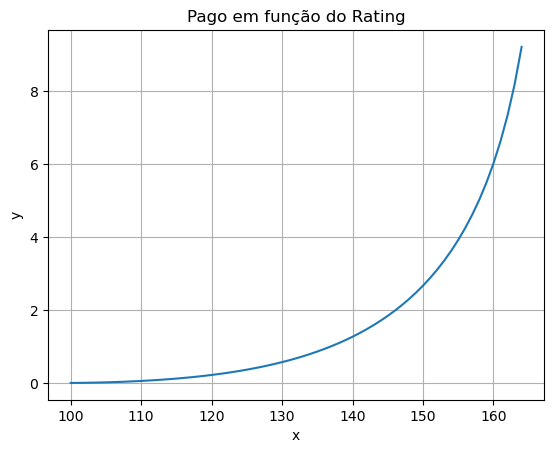

In [114]:
import matplotlib.pyplot as plt

# Definindo a função
def pago(rating):
    bb = 100
    ratingP = 1.5
    ratingMinimo = [100,106,110,135,140,151]
    faltam = 0
    pessoas = 3
    pagar = 200
    pote = 700
    mesmoTurnoP = 1
    mesmoTurno = -1
    
    pago = (10**(-10))*(((rating - ratingMinimo[faltam])*rating**(2))**ratingP)/(170-rating)**(1/2)
    #pago = 1 + pago*(pessoas/4 - faltam/4 + pagar/(75*bb) + pote/(150*bb) + mesmoTurno*mesmoTurnoP/4)
    #pago = pago*bb
    if rating < ratingMinimo[faltam]:
        pago = 0
    return pago  # Exemplo de função x ao quadrado

# Calculando os valores correspondentes de y
x = []
y = []
for i in range(65):
    x.append(i+100)
    y.append(100*pago(i+100))

# Plotando o gráfico
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Pago em função do Rating')
plt.grid(True)
plt.show()

In [ ]:
#Caso ele perca dinheiro por desistir, reduz todos os pagamentos anteriores e aumenta o quanto ele pagaria na rodada
#em que ele desistiu.

#Os ajustes no winrate devem ser referentes a um valor igual a (100-winrate), pois dessa forma, caso o winrate seja muito
#alto, o ideal é que hajam poucos ajustes.

#Colocar para não salvar a primeira partida que ele joga quando acaba de iniciar, porque essa primeira vez é bugada

#Fazer logo o algoritmo lembrando que quando o pote é maior ele tem que pagar mais

#Quando ninguem aposta nada, o jogo detecta que não falta ninguem

#Quando a coleta de dados de fato começar, lembre-se de ocasialmente fazer backup dos dados

In [36]:
bb = 100
ratingP = 2.2
ratingMinimo = [100,106,110,135,140,151]
rating = 120
faltam = 2
pessoas = 3
pagar = 200
pote = 700
mesmoTurnoP = 1
mesmoTurno = -1

pago = ((rating - ratingMinimo[faltam])**ratingP)/(170-rating)
pago = 1 + pago*(pessoas/4 - faltam/4 + pagar/(75*bb) + pote/(150*bb) + mesmoTurno*mesmoTurnoP/4)
pago = pago*bb
print(pago)

123.24510015609636


In [76]:
time.sleep(4)
x = g.position()[0]
y = g.position()[1]
valor = g.pixel(x, y)
print(valor)
print(x,y)

(5, 214, 174)
634 347


In [78]:
time.sleep(4)
g.moveTo(635, 345)

In [137]:
apostado

[0, 0, 0, 0, 0, 0]

In [131]:
mao

['3e', '6p']